In [100]:
import urllib.request

In [247]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
import seaborn as sns

In [12]:
url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
week_nums = [180602, 180609, 180616, 180623, 180630, 180707, 180714, 180721, 180728, 180804, 180811, 180818, 180825]

for week_num in week_nums:
    urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{week_num}.txt",
                               f"data/turnstile_{week_num}.txt")

In [107]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///mta.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [108]:
type(all_data)

pandas.core.frame.DataFrame

In [109]:
all_data.drop_duplicates(inplace = True)

In [110]:
all_data = all_data.drop([0])

In [111]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610


In [112]:
all_data.tail()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2555382,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,REGULAR,5554,348
2555383,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,REGULAR,5554,348
2555384,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,REGULAR,5554,348
2555385,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,REGULAR,5554,348
2555386,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,REGULAR,5554,348


In [113]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555386 entries, 1 to 2555386
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   object
 10  EXITS     object
dtypes: object(11)
memory usage: 234.0+ MB


In [114]:
all_data[['ENTRIES', 'EXITS']] = all_data[['ENTRIES', 'EXITS']].apply(pd.to_numeric)

In [115]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555386 entries, 1 to 2555386
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 234.0+ MB


In [117]:
all_data['DATE_TIME'] = all_data['DATE'] + ' ' + all_data['TIME']

In [118]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498,05/26/2018 00:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500,05/26/2018 04:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517,05/26/2018 08:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577,05/26/2018 12:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610,05/26/2018 16:00:00


In [120]:
all_data['DATE_TIME'] = pd.to_datetime(all_data['DATE_TIME'])

In [121]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555386 entries, 1 to 2555386
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   CA         object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 253.4+ MB


In [127]:
(all_data
.groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(20)

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2296684,R515,R095,00-00-01,ASTORIA DITMARS,2018-08-07 16:00:00,2
2296137,R515,R095,00-00-00,ASTORIA DITMARS,2018-08-08 04:00:00,2
814709,N120A,R153,01-06-00,UTICA AV,2018-07-11 09:00:00,2
2285448,R511,R091,00-00-00,36 AV,2018-06-21 16:00:00,2
2296135,R515,R095,00-00-00,ASTORIA DITMARS,2018-08-07 20:00:00,2
0,A002,R051,02-00-00,59 ST,2018-05-26 00:00:00,1
1703583,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-09 00:00:00,1
1703579,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-08 08:00:00,1
1703580,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-08 12:00:00,1
1703581,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-08 16:00:00,1


In [130]:
import datetime

1st duplicate

In [132]:
mask = ((all_data["CA"] == "R515") & 
(all_data["UNIT"] == "R095") & 
(all_data["SCP"] == "00-00-01") & 
(all_data["STATION"] == "ASTORIA DITMARS") &
(all_data["DATE_TIME"].dt.date == datetime.datetime(2018, 8, 7).date()))

all_data[mask].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2142020,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,00:00:00,REGULAR,70073,59224,2018-08-07 00:00:00
2142021,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,04:00:00,REGULAR,70100,59322,2018-08-07 04:00:00
2142022,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,08:00:00,REGULAR,70914,59404,2018-08-07 08:00:00
2142023,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,12:00:00,REGULAR,72582,59569,2018-08-07 12:00:00
2142024,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,16:00:00,REGULAR,73029,61183,2018-08-07 16:00:00
2142025,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,16:00:00,RECOVR AUD,73029,60159,2018-08-07 16:00:00
2142026,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,08/07/2018,20:00:00,REGULAR,73482,61938,2018-08-07 20:00:00


In [134]:
mask = ((all_data["CA"] == "R515") & 
(all_data["UNIT"] == "R095") & 
(all_data["SCP"] == "00-00-00") & 
(all_data["STATION"] == "ASTORIA DITMARS") &
(all_data["DATE_TIME"].dt.date == datetime.datetime(2018, 8, 8).date()))

all_data[mask].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2141982,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,00:00:00,RECOVR AUD,84884,68385,2018-08-08 00:00:00
2141983,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,04:00:00,REGULAR,85941,68609,2018-08-08 04:00:00
2141984,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,04:00:00,RECOVR AUD,84917,68609,2018-08-08 04:00:00
2141985,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,08:00:00,RECOVR AUD,85854,67177645,2018-08-08 08:00:00
2141986,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,12:00:00,REGULAR,87034,69109,2018-08-08 12:00:00
2141987,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,16:00:00,REGULAR,87557,69912,2018-08-08 16:00:00
2141988,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/08/2018,20:00:00,REGULAR,88014,71930,2018-08-08 20:00:00


In [137]:
mask = ((all_data["CA"] == "N120A") & 
(all_data["UNIT"] == "R153") & 
(all_data["SCP"] == "01-06-00") & 
(all_data["STATION"] == "UTICA AV") &
(all_data["DATE_TIME"].dt.date == datetime.datetime(2018, 7, 11).date()))

all_data[mask].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1243725,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,01:00:00,REGULAR,101636694,64161,2018-07-11 01:00:00
1243726,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,05:00:00,REGULAR,101636713,64167,2018-07-11 05:00:00
1243727,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,09:00:00,REGULAR,101637543,64182,2018-07-11 09:00:00
1243728,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,09:00:00,RECOVR AUD,101637542,64182,2018-07-11 09:00:00
1243729,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,13:00:00,REGULAR,101638048,64192,2018-07-11 13:00:00
1243730,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,17:00:00,REGULAR,101638354,64208,2018-07-11 17:00:00
1243731,N120A,R153,01-06-00,UTICA AV,AC,IND,07/11/2018,21:00:00,REGULAR,101638506,64247,2018-07-11 21:00:00


In [138]:
mask = ((all_data["CA"] == "R511") & 
(all_data["UNIT"] == "R091") & 
(all_data["SCP"] == "00-00-00") & 
(all_data["STATION"] == "36 AV") &
(all_data["DATE_TIME"].dt.date == datetime.datetime(2018, 6, 21).date()))

all_data[mask].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
766659,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,00:00:00,RECOVR AUD,5055163,14849752,2018-06-21 00:00:00
766660,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,04:00:00,RECOVR AUD,5055163,14849752,2018-06-21 04:00:00
766661,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,08:00:00,RECOVR AUD,5055163,14849754,2018-06-21 08:00:00
766662,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,12:00:00,RECOVR AUD,5055163,14849790,2018-06-21 12:00:00
766663,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,16:00:00,REGULAR,17452331,6873767,2018-06-21 16:00:00
766664,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,16:00:00,RECOVR AUD,5055163,14849824,2018-06-21 16:00:00
766665,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,18:46:43,REGULAR,17452331,6873784,2018-06-21 18:46:43
766666,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,20:00:00,REGULAR,17452331,6873786,2018-06-21 20:00:00


Last Duplicate

In [139]:
mask = ((all_data["CA"] == "R515") & 
(all_data["UNIT"] == "R095") & 
(all_data["SCP"] == "00-00-00") & 
(all_data["STATION"] == "ASTORIA DITMARS") &
(all_data["DATE_TIME"].dt.date == datetime.datetime(2018, 8, 7).date()))

all_data[mask].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2141975,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,00:00:00,REGULAR,80927,63745,2018-08-07 00:00:00
2141976,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,04:00:00,REGULAR,80972,63906,2018-08-07 04:00:00
2141977,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,08:00:00,REGULAR,82002,64054,2018-08-07 08:00:00
2141978,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,12:00:00,REGULAR,83758,64455,2018-08-07 12:00:00
2141979,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,16:00:00,REGULAR,84259,65370,2018-08-07 16:00:00
2141980,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,20:00:00,REGULAR,85745,67332,2018-08-07 20:00:00
2141981,R515,R095,00-00-00,ASTORIA DITMARS,NQW,BMT,08/07/2018,20:00:00,RECOVR AUD,84721,67332,2018-08-07 20:00:00


In [140]:
all_data.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [146]:
all_data.DATE.value_counts().sort_index()

05/26/2018    28075
05/27/2018    28135
05/28/2018    28090
05/29/2018    28112
05/30/2018    28014
              ...  
08/20/2018    28254
08/21/2018    28095
08/22/2018    28647
08/23/2018    28726
08/24/2018    27952
Name: DATE, Length: 91, dtype: int64

In [148]:
all_data.sort_values(['CA', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'],
                    inplace=True, ascending=False)
all_data.drop_duplicates(subset = ['CA', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], inplace=True)

In [149]:
(all_data
.groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head()

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-05-26 00:00:00,1
1703591,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-10 08:00:00,1
1703584,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-09 04:00:00,1
1703585,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-09 08:00:00,1
1703586,R143,R032,02-03-03,TIMES SQ-42 ST,2018-08-09 12:00:00,1


In [185]:
all_data.sort_values(['CA', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'],
                    inplace=True, ascending=False)

In [186]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2555386,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,REGULAR,5554,348,2018-08-24 21:00:00
2555385,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,REGULAR,5554,348,2018-08-24 17:00:00
2555384,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,REGULAR,5554,348,2018-08-24 13:00:00
2555383,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,REGULAR,5554,348,2018-08-24 09:00:00
2555382,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,REGULAR,5554,348,2018-08-24 05:00:00


In [209]:
all_data = all_data.drop(['EXITS', 'DESC'], axis = 1, errors = 'ignore')

In [214]:
turnstile_daily = (all_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.first())

In [218]:
turnstile_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/26/2018,6634367
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063


In [219]:
turnstile_daily[['PREV_DATE', 'PREV_ENTRIES']] = (turnstile_daily
                                                  .groupby(['CA', 'UNIT', 'SCP', 'STATION'])['DATE','ENTRIES']
                                                  .apply(lambda grp:grp.shift(1)))

<ipython-input-219-6add6f89c8d8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstile_daily[['PREV_DATE', 'PREV_ENTRIES']] = (turnstile_daily


In [220]:
turnstile_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/26/2018,6634367,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407,05/27/2018,6634856.0
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665,05/28/2018,6635407.0
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063,05/29/2018,6636665.0


In [222]:
turnstile_daily.dropna(subset=['PREV_DATE'], axis = 0, inplace = True)

In [224]:
turnstile_daily[turnstile_daily['ENTRIES']<turnstile_daily['PREV_ENTRIES']].groupby(['CA', 'UNIT', 'SCP', 'STATION']).size()

CA     UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST               1
A006   R079  00-03-01  5 AV/59 ST          1
A011   R080  01-00-00  57 ST-7 AV         90
A025   R023  01-03-01  34 ST-HERALD SQ    90
             01-03-02  34 ST-HERALD SQ    90
                                          ..
R622   R123  00-00-00  FRANKLIN AV        90
R627   R063  00-00-00  SUTTER AV-RUTLD     1
R646   R110  01-00-01  FLATBUSH AV-B.C    90
R730   R431  00-00-04  EASTCHSTER/DYRE    88
TRAM1  R468  00-00-00  RIT-MANHATTAN       1
Length: 209, dtype: int64

In [225]:
turnstile_daily.head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407,05/27/2018,6634856.0
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665,05/28/2018,6635407.0
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063,05/29/2018,6636665.0
5,A002,R051,02-00-00,59 ST,05/31/2018,6639572,05/30/2018,6638063.0
6,A002,R051,02-00-00,59 ST,06/01/2018,6641092,05/31/2018,6639572.0
7,A002,R051,02-00-00,59 ST,06/02/2018,6641810,06/01/2018,6641092.0
8,A002,R051,02-00-00,59 ST,06/03/2018,6642390,06/02/2018,6641810.0
9,A002,R051,02-00-00,59 ST,06/04/2018,6643774,06/03/2018,6642390.0
10,A002,R051,02-00-00,59 ST,06/05/2018,6645266,06/04/2018,6643774.0


In [236]:
def get_daily_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row['ENTRIES'], row['PREV_ENTRIES'])
    if counter > max_counter:
        return 0
    return counter

turnstile_daily['DAILY_ENTRIES'] = turnstile_daily.apply(get_daily_counts, axis = 1, max_counter = 100000)

In [237]:
turnstile_daily.describe()

,ENTRIES,PREV_ENTRIES,daily,DAILY_ENTRIES
count,4.212460e+05,4.212460e+05,421246.000000,421246.000000
mean,4.025119e+07,4.023442e+07,1036.283870,1036.283870
std,2.082165e+08,2.081741e+08,1143.978283,1143.978283
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.918900e+05,4.919070e+05,259.000000,259.000000
50%,2.495708e+06,2.495588e+06,786.000000,786.000000
75%,6.912646e+06,6.911594e+06,1526.000000,1526.000000
max,2.129908e+09,2.129909e+09,98633.000000,98633.000000


In [239]:
ca_unit_station_daily = turnstile_daily.groupby(['CA', 'UNIT', 'STATION', 'DATE']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
ca_unit_station_daily.head()

,CA,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,05/27/2018,5306.0
1,A002,R051,59 ST,05/28/2018,5609.0
2,A002,R051,59 ST,05/29/2018,12526.0
3,A002,R051,59 ST,05/30/2018,13760.0
4,A002,R051,59 ST,05/31/2018,13911.0


In [240]:
station_daily = turnstile_daily.groupby(['STATION', 'DATE']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,05/27/2018,13287.0
1,1 AV,05/28/2018,12572.0
2,1 AV,05/29/2018,20723.0
3,1 AV,05/30/2018,22414.0
4,1 AV,05/31/2018,22932.0


In [249]:
station_total = (turnstile_daily.groupby(['STATION'])
                 .agg({'DAILY_ENTRIES':'sum'})
                 .sort_values('DAILY_ENTRIES', ascending=False).reset_index())
station_total.head(100)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,12690807.0
1,GRD CNTRL-42 ST,11353084.0
2,34 ST-HERALD SQ,9718069.0
3,TIMES SQ-42 ST,8311776.0
4,42 ST-PORT AUTH,8138906.0
...,...,...
95,61 ST WOODSIDE,1322196.0
96,COURT SQ,1311255.0
97,90 ST-ELMHURST,1292397.0
98,RECTOR ST,1291802.0


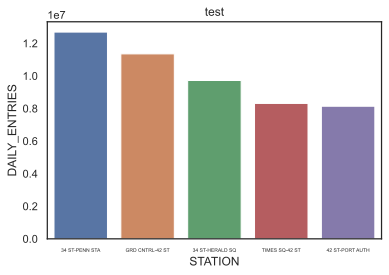

In [255]:
sns.set_theme(style = 'white')
sns.barplot(x = 'STATION', y='DAILY_ENTRIES', data = station_total.head(5))
plt.title('test')
plt.xticks(fontsize = '5');

In [258]:
unique_turnstile_daily = turnstile_daily[(turnstile_daily["CA"] == "A002") & 
(turnstile_daily["UNIT"] == "R051") & 
(turnstile_daily["SCP"] == "02-00-00") & 
(turnstile_daily["STATION"] == "59 ST")]
unique_turnstile_daily

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,daily,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0,489.0,489.0
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407,05/27/2018,6634856.0,551.0,551.0
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665,05/28/2018,6635407.0,1258.0,1258.0
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063,05/29/2018,6636665.0,1398.0,1398.0
5,A002,R051,02-00-00,59 ST,05/31/2018,6639572,05/30/2018,6638063.0,1509.0,1509.0
...,...,...,...,...,...,...,...,...,...,...
86,A002,R051,02-00-00,59 ST,08/20/2018,6730628,08/19/2018,6729424.0,1204.0,1204.0
87,A002,R051,02-00-00,59 ST,08/21/2018,6731912,08/20/2018,6730628.0,1284.0,1284.0
88,A002,R051,02-00-00,59 ST,08/22/2018,6733269,08/21/2018,6731912.0,1357.0,1357.0
89,A002,R051,02-00-00,59 ST,08/23/2018,6734585,08/22/2018,6733269.0,1316.0,1316.0


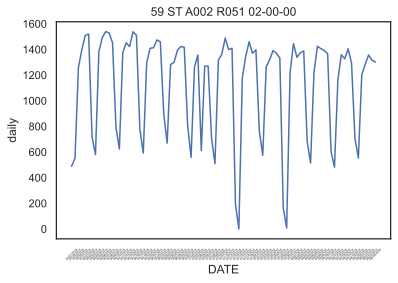

In [292]:
sns.lineplot( x = 'DATE', y = 'daily', data = unique_turnstile_daily)
plt.title('59 ST A002 R051 02-00-00')
plt.xticks(fontsize = '3', rotation = 45);

In [264]:
unique_station_daily = station_daily[station_daily["STATION"] == "59 ST"]
unique_station_daily

,STATION,DATE,DAILY_ENTRIES
7400,59 ST,05/27/2018,26261.0
7401,59 ST,05/28/2018,29581.0
7402,59 ST,05/29/2018,65912.0
7403,59 ST,05/30/2018,72090.0
7404,59 ST,05/31/2018,72079.0
...,...,...,...
7485,59 ST,08/20/2018,56394.0
7486,59 ST,08/21/2018,61774.0
7487,59 ST,08/22/2018,63578.0
7488,59 ST,08/23/2018,62896.0


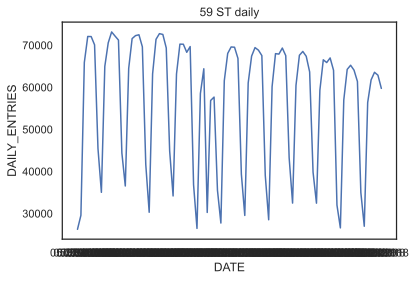

In [267]:
sns.lineplot( x = 'DATE', y = 'DAILY_ENTRIES', data = unique_station_daily)
plt.title('59 ST daily');

In [270]:
station_daily['DATE'] = pd.to_datetime(station_daily['DATE'])

In [271]:
station_daily['dayofweek'] = station_daily['DATE'].dt.dayofweek

In [293]:
station_daily['weekofyear'] = station_daily['DATE'].dt.week

<ipython-input-293-dec4bd9f3927>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily['weekofyear'] = station_daily['DATE'].dt.week


In [299]:
unique_station_daily['DATE'] = pd.to_datetime(unique_station_daily['DATE'])
unique_station_daily['dayofweek'] = unique_station_daily['DATE'].dt.dayofweek
unique_station_daily['weekofyear'] = unique_station_daily['DATE'].dt.week
unique_station_daily.head()

<ipython-input-299-a533e9fb34fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_station_daily['DATE'] = pd.to_datetime(unique_station_daily['DATE'])
<ipython-input-299-a533e9fb34fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_station_daily['dayofweek'] = unique_station_daily['DATE'].dt.dayofweek
<ipython-input-299-a533e9fb34fd>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  unique_station_daily['weekofy

,STATION,DATE,DAILY_ENTRIES,dayofweek,weekofyear
7400,59 ST,2018-05-27,26261.0,6,21
7401,59 ST,2018-05-28,29581.0,0,22
7402,59 ST,2018-05-29,65912.0,1,22
7403,59 ST,2018-05-30,72090.0,2,22
7404,59 ST,2018-05-31,72079.0,3,22


Text(0.5, 1.0, 'Ridership per day for 59 ST station')

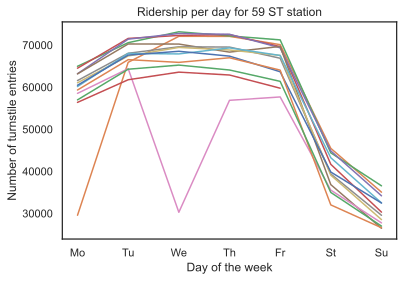

In [301]:
for i, group in unique_station_daily.groupby(['weekofyear']):
    plt.plot(group['dayofweek'], group['DAILY_ENTRIES'])

plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7), ['Mo', 'Tu', 'We', 'Th', 'Fr', 'St', 'Su'])
plt.title('Ridership per day for 59 ST station')

In [275]:
station_total.head()


,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,12690807.0
1,GRD CNTRL-42 ST,11353084.0
2,34 ST-HERALD SQ,9718069.0
3,TIMES SQ-42 ST,8311776.0
4,42 ST-PORT AUTH,8138906.0


(array([276.,  65.,  16.,   7.,   5.,   1.,   4.,   1.,   1.,   1.]),
 array([8.8670000e+03, 1.2770610e+06, 2.5452550e+06, 3.8134490e+06,
        5.0816430e+06, 6.3498370e+06, 7.6180310e+06, 8.8862250e+06,
        1.0154419e+07, 1.1422613e+07, 1.2690807e+07]),
 <BarContainer object of 10 artists>)

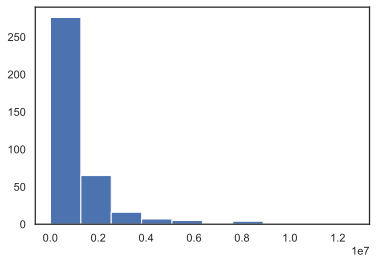

In [290]:
plt.hist(station_total['DAILY_ENTRIES'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

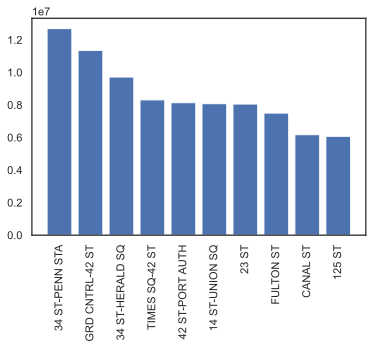

In [291]:
plt.bar(x=station_total['STATION'][:10], height=station_total['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)

10th) 125st - columbia university, city college NY
2nd) GRD CNTRL-42st - Berkeley College
6th) 14ST-UNION SQ - NYU, St.Johns Univeristy

In [308]:
station_daily_34ST_PENN = station_daily[station_daily['STATION'] == '34 ST-PENN STA']
station_daily_34ST_PENN = station_daily_34ST_PENN.drop(['station'], axis = 1)
station_daily_34ST_PENN

,STATION,DATE,DAILY_ENTRIES,dayofweek,weekofyear
5364,34 ST-PENN STA,2018-05-27,67138.0,6,21
5365,34 ST-PENN STA,2018-05-28,79565.0,0,22
5366,34 ST-PENN STA,2018-05-29,171163.0,1,22
5367,34 ST-PENN STA,2018-05-30,175171.0,2,22
5368,34 ST-PENN STA,2018-05-31,174468.0,3,22
...,...,...,...,...,...
5449,34 ST-PENN STA,2018-08-20,155409.0,0,34
5450,34 ST-PENN STA,2018-08-21,156563.0,1,34
5451,34 ST-PENN STA,2018-08-22,160077.0,2,34
5452,34 ST-PENN STA,2018-08-23,160018.0,3,34


Text(0.5, 1.0, 'Ridership per day for 59 ST station')

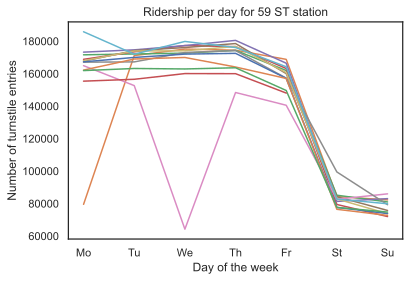

In [309]:
for i, group in station_daily_34ST_PENN.groupby(['weekofyear']):
    plt.plot(group['dayofweek'], group['DAILY_ENTRIES'])

plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7), ['Mo', 'Tu', 'We', 'Th', 'Fr', 'St', 'Su'])
plt.title('Ridership per day for 59 ST station')

In [326]:
mask = ((station_daily['STATION'] == '34 ST-PENN STA') |
(station_daily['STATION'] == 'GRD CNTRL-42 ST') |
(station_daily['STATION'] == '34 ST-HERALD SQ') |
(station_daily['STATION'] == 'TIMES SQ-42 ST') |
(station_daily['STATION'] == '42 ST-PORT AUTH') |
(station_daily['STATION'] == '14 ST-UNION SQ') |
(station_daily['STATION'] == '23 ST') |
(station_daily['STATION'] == 'FULTON ST') |
(station_daily['STATION'] == 'CANAL ST') |
(station_daily['STATION'] == '125 ST'))
station_daily_top_ten = station_daily[mask]
station_daily_top_ten.head()

,STATION,DATE,DAILY_ENTRIES,dayofweek,weekofyear
810,125 ST,2018-05-27,38927.0,6,21
811,125 ST,2018-05-28,41203.0,0,22
812,125 ST,2018-05-29,81122.0,1,22
813,125 ST,2018-05-30,82532.0,2,22
814,125 ST,2018-05-31,82727.0,3,22


In [334]:
station_daily_top_five = station_daily[(station_daily['STATION'] == '34 ST-PENN STA') |
(station_daily['STATION'] == 'GRD CNTRL-42 ST') |
(station_daily['STATION'] == '34 ST-HERALD SQ') |
(station_daily['STATION'] == 'TIMES SQ-42 ST') |
(station_daily['STATION'] == '42 ST-PORT AUTH')]

In [335]:
sdtfg = station_daily_top_five.groupby(['STATION', 'dayofweek']).agg({'DAILY_ENTRIES':'sum'}).reset_index()

In [331]:
sdttg = station_daily_top_ten.groupby(['STATION', 'dayofweek']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
sdttg.head(20)

,STATION,dayofweek,DAILY_ENTRIES
0,125 ST,0,918822.0
1,125 ST,1,986409.0
2,125 ST,2,959926.0
3,125 ST,3,998391.0
4,125 ST,4,991480.0
5,125 ST,5,629927.0
6,125 ST,6,587808.0
7,14 ST-UNION SQ,0,1176336.0
8,14 ST-UNION SQ,1,1310366.0
9,14 ST-UNION SQ,2,1320141.0


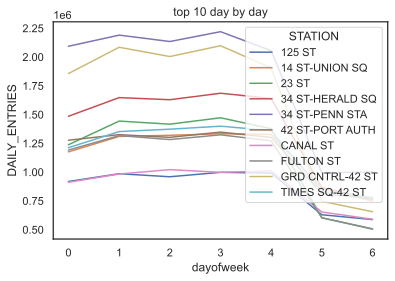

In [333]:
sns.lineplot( x = 'dayofweek', y = 'DAILY_ENTRIES', data = sdttg, hue = 'STATION')
plt.title('top 10 day by day');


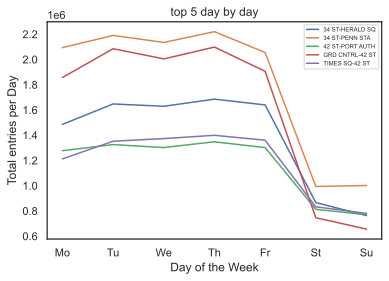

In [342]:
sns.lineplot( x = 'dayofweek', y = 'DAILY_ENTRIES', data = sdtfg, hue = 'STATION')
plt.title('top 5 day by day')
plt.legend(loc = 0 , prop = {'size':6})
plt.xlabel('Day of the Week')
plt.ylabel('Total entries per Day')
plt.xticks(np.arange(7), ['Mo', 'Tu', 'We', 'Th', 'Fr', 'St', 'Su']);

In [344]:
station_daily_other = station_daily[(station_daily['STATION'] == '14 ST-UNION SQ') |
(station_daily['STATION'] == '23 ST') |
(station_daily['STATION'] == 'FULTON ST') |
(station_daily['STATION'] == 'CANAL ST') |
(station_daily['STATION'] == '125 ST')]

In [346]:
sdtog = station_daily_other.groupby(['STATION', 'dayofweek']).agg({'DAILY_ENTRIES':'sum'}).reset_index()

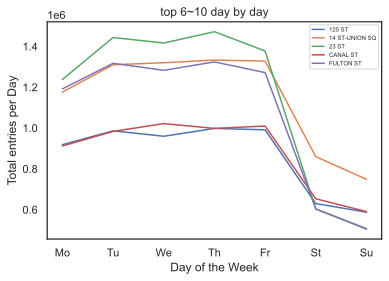

In [348]:
sns.lineplot( x = 'dayofweek', y = 'DAILY_ENTRIES', data = sdtog, hue = 'STATION')
plt.title('top 6~10 day by day')
plt.legend(loc = 0 , prop = {'size':6})
plt.xlabel('Day of the Week')
plt.ylabel('Total entries per Day')
plt.xticks(np.arange(7), ['Mo', 'Tu', 'We', 'Th', 'Fr', 'St', 'Su']);

In [349]:
station_daily_ano = station_daily[(station_daily['STATION'] == 'TIMES SQ-42 ST') |
(station_daily['STATION'] == '42 ST-PORT AUTH') |
(station_daily['STATION'] == '23 ST')]
station_daily_ano.head()

,STATION,DATE,DAILY_ENTRIES,dayofweek,weekofyear
4039,23 ST,2018-05-27,33248.0,6,21
4040,23 ST,2018-05-28,33375.0,0,22
4041,23 ST,2018-05-29,105245.0,1,22
4042,23 ST,2018-05-30,119889.0,2,22
4043,23 ST,2018-05-31,122587.0,3,22


In [356]:
station_daily_ano['WEEKEND'] = np.where(station_daily_ano.dayofweek.isin([5,6]), 1, 0)
station_daily_ano

<ipython-input-356-70ed1e00ecde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_ano['WEEKEND'] = np.where(station_daily_ano.dayofweek.isin([5,6]), 1, 0)


,STATION,DATE,DAILY_ENTRIES,dayofweek,weekofyear,WEEKEND
4039,23 ST,2018-05-27,33248.0,6,21,1
4040,23 ST,2018-05-28,33375.0,0,22,0
4041,23 ST,2018-05-29,105245.0,1,22,0
4042,23 ST,2018-05-30,119889.0,2,22,0
4043,23 ST,2018-05-31,122587.0,3,22,0
...,...,...,...,...,...,...
31578,TIMES SQ-42 ST,2018-08-20,93368.0,0,34,0
31579,TIMES SQ-42 ST,2018-08-21,99975.0,1,34,0
31580,TIMES SQ-42 ST,2018-08-22,104317.0,2,34,0
31581,TIMES SQ-42 ST,2018-08-23,104081.0,3,34,0


In [354]:
station_daily_ano.groupby(['STATION', 'dayofweek']).agg({'DAILY_ENTRIES':'sum'}).reset_index()

,STATION,dayofweek,DAILY_ENTRIES
0,23 ST,0,1238262.0
1,23 ST,1,1443642.0
2,23 ST,2,1416857.0
3,23 ST,3,1472438.0
4,23 ST,4,1377535.0
5,23 ST,5,602897.0
6,23 ST,6,504745.0
7,42 ST-PORT AUTH,0,1277378.0
8,42 ST-PORT AUTH,1,1325838.0
9,42 ST-PORT AUTH,2,1302385.0


In [353]:
station_daily_ano.groupby(['STATION']).agg({'DAILY_ENTRIES':'sum'}).sort_values('DAILY_ENTRIES', ascending=False).reset_index()

,STATION,DAILY_ENTRIES
0,TIMES SQ-42 ST,8311776.0
1,42 ST-PORT AUTH,8138906.0
2,23 ST,8056376.0


In [359]:
sdag =station_daily_ano.groupby(['STATION','WEEKEND']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
sdag

,STATION,WEEKEND,DAILY_ENTRIES
0,23 ST,0,6948734.0
1,23 ST,1,1107642.0
2,42 ST-PORT AUTH,0,6555357.0
3,42 ST-PORT AUTH,1,1583549.0
4,TIMES SQ-42 ST,0,6698420.0
5,TIMES SQ-42 ST,1,1613356.0


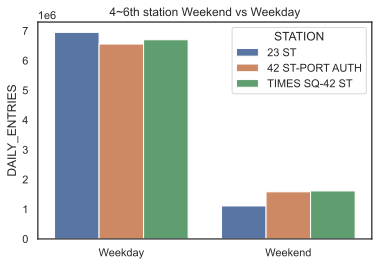

In [365]:
sns.barplot(x = 'WEEKEND', y = 'DAILY_ENTRIES', hue = 'STATION', data = sdag)
plt.title('4~6th station Weekend vs Weekday')
plt.xlabel('')
plt.xticks(np.arange(2), ['Weekday', 'Weekend']);

In [370]:
mask = ((station_daily['STATION'] == '34 ST-PENN STA') |
(station_daily['STATION'] == 'GRD CNTRL-42 ST') |
(station_daily['STATION'] == '34 ST-HERALD SQ') |
(station_daily['STATION'] == 'TIMES SQ-42 ST') |
(station_daily['STATION'] == '42 ST-PORT AUTH') |
(station_daily['STATION'] == '14 ST-UNION SQ') |
(station_daily['STATION'] == '23 ST') |
(station_daily['STATION'] == 'FULTON ST') |
(station_daily['STATION'] == 'CANAL ST') |
(station_daily['STATION'] == '125 ST'))

In [368]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2555386,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,2018-08-24 21:00:00
2555385,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,2018-08-24 17:00:00
2555384,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,2018-08-24 13:00:00
2555383,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,2018-08-24 09:00:00
2555382,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,2018-08-24 05:00:00


In [376]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555381 entries, 2555386 to 1
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   CA         object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   ENTRIES    int64         
 9   DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 214.5+ MB


In [372]:
topten_alldata = all_data[((all_data['STATION'] == '34 ST-PENN STA') |
(all_data['STATION'] == 'GRD CNTRL-42 ST') |
(all_data['STATION'] == '34 ST-HERALD SQ') |
(all_data['STATION'] == 'TIMES SQ-42 ST') |
(all_data['STATION'] == '42 ST-PORT AUTH') |
(all_data['STATION'] == '14 ST-UNION SQ') |
(all_data['STATION'] == '23 ST') |
(all_data['STATION'] == 'FULTON ST') |
(all_data['STATION'] == 'CANAL ST') |
(all_data['STATION'] == '125 ST'))]

In [375]:
topten_alldata['DATE'] = pd.to_datetime(topten_alldata['DATE'])

<ipython-input-375-e6871f8dc1c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_alldata['DATE'] = pd.to_datetime(topten_alldata['DATE'])


In [378]:
topten_alldata['DAYOFWEEK'] = topten_alldata['DATE'].dt.dayofweek

<ipython-input-378-b7041ff4d6c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_alldata['DAYOFWEEK'] = topten_alldata['DATE'].dt.dayofweek


In [382]:
topten_alldata['WEEKEND'] = np.where(topten_alldata['DAYOFWEEK'].isin([5,6]), 1, 0)
topten_alldata

<ipython-input-382-a87ebeef2f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_alldata['WEEKEND'] = np.where(topten_alldata['DAYOFWEEK'].isin([5,6]), 1, 0)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DAYOFWEEK,WEEKEND
2521732,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,21:00:00,244699015,2018-08-24 21:00:00,4,0
2521731,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,17:00:00,244698357,2018-08-24 17:00:00,4,0
2521730,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,13:00:00,244697915,2018-08-24 13:00:00,4,0
2521729,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,09:00:00,244697616,2018-08-24 09:00:00,4,0
2521728,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,05:00:00,244697467,2018-08-24 05:00:00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2609,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-05-26,16:00:00,7806430,2018-05-26 16:00:00,5,1
2608,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-05-26,12:00:00,7806103,2018-05-26 12:00:00,5,1
2607,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-05-26,08:00:00,7805901,2018-05-26 08:00:00,5,1
2606,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-05-26,04:00:00,7805827,2018-05-26 04:00:00,5,1


In [385]:
topten_alldata['TIME'] = pd.to_datetime(topten_alldata['TIME'])

<ipython-input-385-691af6599924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_alldata['TIME'] = pd.to_datetime(topten_alldata['TIME'])


In [386]:
topten_alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338316 entries, 2521732 to 2605
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   CA         338316 non-null  object        
 1   UNIT       338316 non-null  object        
 2   SCP        338316 non-null  object        
 3   STATION    338316 non-null  object        
 4   LINENAME   338316 non-null  object        
 5   DIVISION   338316 non-null  object        
 6   DATE       338316 non-null  datetime64[ns]
 7   TIME       338316 non-null  datetime64[ns]
 8   ENTRIES    338316 non-null  int64         
 9   DATE_TIME  338316 non-null  datetime64[ns]
 10  DAYOFWEEK  338316 non-null  int64         
 11  WEEKEND    338316 non-null  int32         
dtypes: datetime64[ns](3), int32(1), int64(2), object(6)
memory usage: 32.3+ MB


In [394]:
station_hourly = topten_alldata.groupby(['STATION','WEEKEND', pd.Grouper(key='TIME', freq='6H')]).agg({})

In [395]:
station_hourly.head(50)

STATION          WEEKEND  TIME               
125 ST           0        2021-03-31 00:00:00    244697467
                          2021-03-31 06:00:00    244697616
                          2021-03-31 12:00:00    244698357
                          2021-03-31 18:00:00    244699015
                 1        2021-03-31 00:00:00    244691944
                          2021-03-31 06:00:00    244691982
                          2021-03-31 12:00:00    244692352
                          2021-03-31 18:00:00    244692500
14 ST-UNION SQ   0        2021-03-31 00:00:00      5300477
                          2021-03-31 06:00:00      5300499
                          2021-03-31 12:00:00      5300759
                          2021-03-31 18:00:00      5301068
                 1        2021-03-31 00:00:00      5297737
                          2021-03-31 06:00:00      5297738
                          2021-03-31 12:00:00      5297881
                          2021-03-31 18:00:00      5298032
23 ST     

In [411]:
dowt

,dayofweek,DAILY_ENTRIES
0,0,13364587.0
1,1,14643446.0
2,2,14446371.0
3,3,14878662.0
4,4,14242759.0
5,5,7603003.0
6,6,6910960.0


In [413]:
dowt = station_daily_top_ten.groupby(['dayofweek']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
dowt.dayofweek.iloc[0] = 'Mo'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [415]:
dowt.dayofweek.iloc[1] = 'Tu'
dowt.dayofweek.iloc[2] = 'We'
dowt.dayofweek.iloc[3] = 'Th'
dowt.dayofweek.iloc[4] = 'Fr'
dowt.dayofweek.iloc[5] = 'Sa'
dowt.dayofweek.iloc[6] = 'Su'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Total Daily Entries')

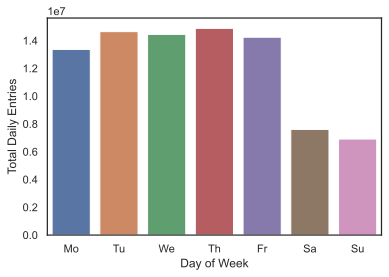

In [418]:
sns.barplot(x='dayofweek', y='DAILY_ENTRIES', data = dowt)
plt.xlabel('Day of Week')
plt.ylabel('Total Daily Entries')

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,12690807.0
1,GRD CNTRL-42 ST,11353084.0
2,34 ST-HERALD SQ,9718069.0
3,TIMES SQ-42 ST,8311776.0
4,42 ST-PORT AUTH,8138906.0
5,14 ST-UNION SQ,8077298.0
6,23 ST,8056376.0
7,FULTON ST,7499944.0
8,CANAL ST,6170765.0
9,125 ST,6072763.0


In [445]:
station_total['DAILY_ENTRIES'] = station_total['DAILY_ENTRIES'].apply(lambda x: x/1000000)

In [472]:
station_daily_top_ten['WEEKEND'] = np.where(station_daily_top_ten['dayofweek'].isin([5,6]), 1, 0)
sdttwg = station_daily_top_ten.groupby(['STATION','WEEKEND']).agg({'DAILY_ENTRIES':'sum'}).reset_index().sort_values('DAILY_ENTRIES', ascending = False)

<ipython-input-472-516913e5d6f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_top_ten['WEEKEND'] = np.where(station_daily_top_ten['dayofweek'].isin([5,6]), 1, 0)


,STATION,WEEKEND,DAILY_ENTRIES
8,34 ST-PENN STA,0,10695104.0
16,GRD CNTRL-42 ST,0,9950694.0
6,34 ST-HERALD SQ,0,8088480.0
4,23 ST,0,6948734.0
18,TIMES SQ-42 ST,0,6698420.0
10,42 ST-PORT AUTH,0,6555357.0
2,14 ST-UNION SQ,0,6468486.0
14,FULTON ST,0,6389015.0
12,CANAL ST,0,4926507.0
0,125 ST,0,4855028.0


In [492]:
mask = (sdttwg['WEEKEND'] == 0)
mask1 = (sdttwg['WEEKEND'] != 0)
weekday = sdttwg[mask]
weekend = sdttwg[mask1]
sdttwg['avg'] = 0
sdttwg.loc[mask, 'avg'] = weekday['DAILY_ENTRIES']/5
sdttwg.loc[mask1, 'avg'] = weekend['DAILY_ENTRIES']/2
sdttwg['avg'] = sdttwg['avg'].apply(lambda x:x/1000000) #initially wanted total traffic of weekend vs weekday in millions
sdttwg['avg'] = sdttwg['avg'].apply(lambda x:x/13) #daily traffic of weekend vs weekday
sdttwg['avg'] = sdttwg['avg'].apply(lambda x:x*1000) #needed to change the y scale into thousands instead of millions

### First Graph 
**Total Traffic By Station**

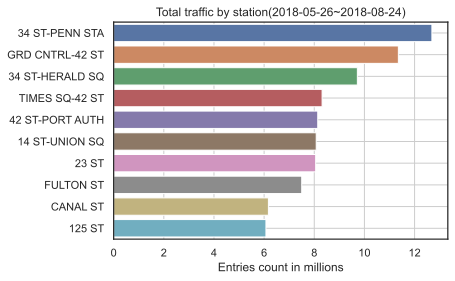

In [483]:
sns.barplot(y='STATION', x= 'DAILY_ENTRIES', data=station_total.head(10), orient='h')
plt.title('Total traffic by station(2018-05-26~2018-08-24)')
plt.grid()
plt.xlabel('Entries count in millions')
plt.ylabel('')
plt.xticks(np.arange(0, 14, step = 2));

### Second Graph
**Daily traffic average weekday/weekend by station**

([<matplotlib.axis.XTick at 0x21511641460>,
 [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

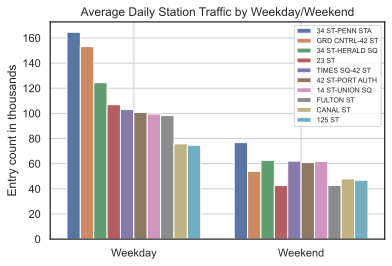

In [597]:
sns.barplot( x= 'WEEKEND', y= 'avg', data = sdttwg, hue = 'STATION')
plt.title('Average Daily Station Traffic by Weekday/Weekend')
plt.legend(prop={'size': 7})
plt.grid()
plt.xlabel('')
plt.ylabel('Entry count in thousands')
plt.xticks(np.arange(2), ['Weekday', 'Weekend'])

### Third Graph
**Daily hourly average per weekday**

In [508]:
topten_alldata.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DAYOFWEEK,WEEKEND
2521732,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,2021-03-31 21:00:00,244699015,2018-08-24 21:00:00,4,0
2521731,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,2021-03-31 17:00:00,244698357,2018-08-24 17:00:00,4,0
2521730,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,2021-03-31 13:00:00,244697915,2018-08-24 13:00:00,4,0
2521729,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,2021-03-31 09:00:00,244697616,2018-08-24 09:00:00,4,0
2521728,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,2021-03-31 05:00:00,244697467,2018-08-24 05:00:00,4,0
2521727,R305,R206,01-00-02,125 ST,23,IRT,2018-08-24,2021-03-31 01:00:00,244697465,2018-08-24 01:00:00,4,0
2521726,R305,R206,01-00-02,125 ST,23,IRT,2018-08-23,2021-03-31 21:00:00,244697368,2018-08-23 21:00:00,3,0
2521725,R305,R206,01-00-02,125 ST,23,IRT,2018-08-23,2021-03-31 17:00:00,244696983,2018-08-23 17:00:00,3,0
2521724,R305,R206,01-00-02,125 ST,23,IRT,2018-08-23,2021-03-31 13:00:00,244696654,2018-08-23 13:00:00,3,0
2521723,R305,R206,01-00-02,125 ST,23,IRT,2018-08-23,2021-03-31 09:00:00,244696489,2018-08-23 09:00:00,3,0


In [511]:
topten_alldata[['PREV_DATE', 'PREV_ENTRIES']] = (topten_alldata
                                                  .groupby(['CA','UNIT','SCP','STATION'])['DATE_TIME','ENTRIES']
                                                  .apply(lambda grp:grp.shift(1)))

<ipython-input-511-ee66cdb1a9b3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topten_alldata[['PREV_DATE', 'PREV_ENTRIES']] = (topten_alldata
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [513]:
topten_alldata.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

<ipython-input-513-bf67951ba514>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_alldata.dropna(subset=['PREV_DATE'], axis=0, inplace=True)


In [514]:
topten_alldata['HOURF_ENTRIES'] = topten_alldata.apply(get_daily_counts, axis = 1, max_counter = 10000)

<ipython-input-514-e84dc47b4486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topten_alldata['HOURF_ENTRIES'] = topten_alldata.apply(get_daily_counts, axis = 1, max_counter = 10000)


In [515]:
topten_alldata.describe()

,ENTRIES,DAYOFWEEK,WEEKEND,PREV_ENTRIES,HOURF_ENTRIES
count,3.376920e+05,337692.000000,337692.000000,3.376920e+05,337692.000000
mean,7.305526e+07,2.996215,0.285592,7.304942e+07,256.060351
std,2.908433e+08,1.999973,0.451696,2.908243e+08,346.780951
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,1.144949e+06,1.000000,0.000000,1.145099e+06,20.000000
50%,4.048126e+06,3.000000,0.000000,4.048226e+06,127.000000
75%,9.616613e+06,5.000000,1.000000,9.616468e+06,358.000000
max,2.113961e+09,6.000000,1.000000,2.113961e+09,4398.000000


In [519]:
topten_hour = topten_alldata.groupby(['STATION', 'WEEKEND', 'TIME']).agg({'HOURF_ENTRIES':'sum'}).reset_index()
topten_hour[topten_hour['STATION'=='125 ST']]

,STATION,WEEKEND,TIME,HOURF_ENTRIES
0,125 ST,0,2021-03-31 00:00:00,37476.0
1,125 ST,0,2021-03-31 01:00:00,35710.0
2,125 ST,0,2021-03-31 04:00:00,237430.0
3,125 ST,0,2021-03-31 05:00:00,525680.0
4,125 ST,0,2021-03-31 06:40:57,12.0
...,...,...,...,...
387,TIMES SQ-42 ST,1,2021-03-31 08:00:00,175937.0
388,TIMES SQ-42 ST,1,2021-03-31 09:25:08,1344.0
389,TIMES SQ-42 ST,1,2021-03-31 12:00:00,307766.0
390,TIMES SQ-42 ST,1,2021-03-31 16:00:00,469032.0


In [523]:
topten_hour[topten_hour['STATION'] =='125 ST']

,STATION,WEEKEND,TIME,HOURF_ENTRIES
0,125 ST,0,2021-03-31 00:00:00,37476.0
1,125 ST,0,2021-03-31 01:00:00,35710.0
2,125 ST,0,2021-03-31 04:00:00,237430.0
3,125 ST,0,2021-03-31 05:00:00,525680.0
4,125 ST,0,2021-03-31 06:40:57,12.0
5,125 ST,0,2021-03-31 06:42:18,10.0
6,125 ST,0,2021-03-31 06:43:43,21.0
7,125 ST,0,2021-03-31 06:45:03,22.0
8,125 ST,0,2021-03-31 06:46:23,6.0
9,125 ST,0,2021-03-31 06:47:43,1012.0


In [549]:
tthg = topten_hour.groupby(['STATION', 'WEEKEND', pd.Grouper(key='TIME', freq='6h')]).agg({'HOURF_ENTRIES':'sum'}).reset_index()
tthg.head(10)

,STATION,WEEKEND,TIME,HOURF_ENTRIES
0,125 ST,0,2021-03-31 00:00:00,836296.0
1,125 ST,0,2021-03-31 06:00:00,1107996.0
2,125 ST,0,2021-03-31 12:00:00,2473150.0
3,125 ST,0,2021-03-31 18:00:00,461881.0
4,125 ST,1,2021-03-31 00:00:00,137078.0
5,125 ST,1,2021-03-31 06:00:00,242098.0
6,125 ST,1,2021-03-31 12:00:00,668489.0
7,125 ST,1,2021-03-31 18:00:00,187113.0
8,14 ST-UNION SQ,0,2021-03-31 00:00:00,620667.0
9,14 ST-UNION SQ,0,2021-03-31 06:00:00,897926.0


In [550]:
tthg = tthg[tthg['WEEKEND'] == 0]
tthg.reset_index()

,index,STATION,WEEKEND,TIME,HOURF_ENTRIES
0,0,125 ST,0,2021-03-31 00:00:00,836296.0
1,1,125 ST,0,2021-03-31 06:00:00,1107996.0
2,2,125 ST,0,2021-03-31 12:00:00,2473150.0
3,3,125 ST,0,2021-03-31 18:00:00,461881.0
4,8,14 ST-UNION SQ,0,2021-03-31 00:00:00,620667.0
5,9,14 ST-UNION SQ,0,2021-03-31 06:00:00,897926.0
6,10,14 ST-UNION SQ,0,2021-03-31 12:00:00,4106319.0
7,11,14 ST-UNION SQ,0,2021-03-31 18:00:00,923186.0
8,16,23 ST,0,2021-03-31 00:00:00,516019.0
9,17,23 ST,0,2021-03-31 06:00:00,1197137.0


In [551]:
tthg['HOURF_ENTRIES'] = tthg['HOURF_ENTRIES'].apply(lambda x:x/65) # 13(weeks)*5(days)=65 divided to calculate daily 6hour frame
tthg.head(10)

,STATION,WEEKEND,TIME,HOURF_ENTRIES
0,125 ST,0,2021-03-31 00:00:00,12866.092308
1,125 ST,0,2021-03-31 06:00:00,17046.092308
2,125 ST,0,2021-03-31 12:00:00,38048.461538
3,125 ST,0,2021-03-31 18:00:00,7105.861538
8,14 ST-UNION SQ,0,2021-03-31 00:00:00,9548.723077
9,14 ST-UNION SQ,0,2021-03-31 06:00:00,13814.246154
10,14 ST-UNION SQ,0,2021-03-31 12:00:00,63174.138462
11,14 ST-UNION SQ,0,2021-03-31 18:00:00,14202.861538
16,23 ST,0,2021-03-31 00:00:00,7938.753846
17,23 ST,0,2021-03-31 06:00:00,18417.492308


([<matplotlib.axis.YTick at 0x21556faf580>,
 [Text(0, 0, '0:00~6:00'),
  Text(0, 1, '6:00~12:00'),
  Text(0, 2, '12:00~18:00'),
  Text(0, 3, '18:00~24:00')])

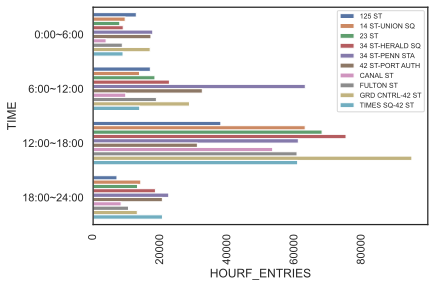

In [552]:
sns.barplot(x='HOURF_ENTRIES', y='TIME', hue = 'STATION', data= tthg)
plt.legend(prop={'size':7})
plt.xticks(rotation=90)
plt.yticks(np.arange(4), ['0:00~6:00', '6:00~12:00', '12:00~18:00', '18:00~24:00'])

In [565]:
final = tthg.pivot_table('HOURF_ENTRIES', ['STATION'],'TIME')
final

TIME,2021-03-31 00:00:00,2021-03-31 06:00:00,2021-03-31 12:00:00,2021-03-31 18:00:00
STATION,,,,
125 ST,12866.092308,17046.092308,38048.461538,7105.861538
14 ST-UNION SQ,9548.723077,13814.246154,63174.138462,14202.861538
23 ST,7938.753846,18417.492308,68207.338462,13231.661538
34 ST-HERALD SQ,8968.738462,22727.553846,75344.876923,18559.830769
34 ST-PENN STA,17765.476923,63207.215385,61129.569231,22529.246154
42 ST-PORT AUTH,17226.907692,32528.184615,31057.507692,20627.061538
CANAL ST,3865.600000,9718.600000,53489.323077,8340.738462
FULTON ST,8696.738462,18846.353846,60745.369231,10536.430769
GRD CNTRL-42 ST,16997.000000,28700.769231,94955.384615,13161.553846


In [582]:
final.columns = ['1st', '2nd', '3rd', '4th']
final = final.reset_index()

In [583]:
final.columns

Index(['STATION', '1st', '2nd', '3rd', '4th'], dtype='object')

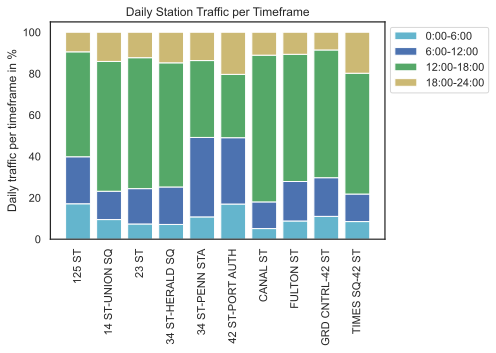

In [600]:
r = np.arange(10)
totals = [i+j+k+l for i,j,k,l in zip(final['1st'], final['2nd'], final['3rd'], final['4th'])]
first = [i/j*100 for i,j in zip(final['1st'], totals)]
second = [i/j*100 for i,j in zip(final['2nd'], totals)]
third = [i/j*100 for i,j in zip(final['3rd'], totals)]
fourth = [i/j*100 for i,j in zip(final['4th'], totals)]
names = final['STATION']
plt.title('Daily Station Traffic per Timeframe')
plt.bar(r, first, color = 'c', label = "0:00-6:00")
plt.bar(r, second, bottom = first, color = 'b', label = "6:00-12:00")
plt.bar(r, third, bottom = [i+j for i,j in zip(first, second)], color = 'g', label = "12:00-18:00")
plt.bar(r, fourth, bottom = [i+j+k for i,j,k in zip(first, second, third)], color = 'y', label = "18:00-24:00")
plt.xticks(r, names, rotation = 90)
plt.ylabel('Daily traffic per timeframe in %')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);